# Analysis of interaction frequency and distance

In this notebook, a module that can be used to investigate distributions of read pair numbers per interaction and interaction distances is demonstrated.

## Setting up the notebook

In [3]:
import sys
import os
import pandas
sys.path.append("..")
from diachr import DiachromaticInteractionSet
from diachr import IaFreqDistAnalysis

## Test file

We have prepared a small test file in ``Diachromatic11`` format (already contains the  interaction categories ``DI``, ``UIR`` and ``UI``) that only contains interactions on chromosome ``chr21`` and ``chr22``.

In [4]:
# Interactions on 'chr21' and 'chr22' only
INTERACTION_FILE = "../tests/data/baited_digests_d11_interaction_test_file.tsv.gz"
INTERACTION_FILE = "../tests/data/baited_digests_d11_interaction_test_file_2.tsv.gz"

# Interactions on all chromosomes
#INTERACTION_FILE = "../DICer_interactions/JAV_MK_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"
#INTERACTION_FILE = "../DICer_interactions/JAV_ERY_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"
#INTERACTION_FILE = "../DICer_interactions/JAV_NEU_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"
#INTERACTION_FILE = "../DICer_interactions/JAV_MON_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"
#INTERACTION_FILE = "../DICer_interactions/JAV_MAC_M0_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"
#INTERACTION_FILE = "../DICer_interactions/JAV_MAC_M1_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"
#INTERACTION_FILE = "../DICer_interactions/JAV_MAC_M2_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"
#INTERACTION_FILE = "../DICer_interactions/JAV_EP_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"
#INTERACTION_FILE = "../DICer_interactions/JAV_NB_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"
#INTERACTION_FILE = "../DICer_interactions/JAV_TB_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"
#INTERACTION_FILE = "../DICer_interactions/JAV_FOET_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"
#INTERACTION_FILE = "../DICer_interactions/JAV_NCD4_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"
#INTERACTION_FILE = "../DICer_interactions/JAV_TCD4_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"
#INTERACTION_FILE = "../DICer_interactions/JAV_NACD4_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"
#INTERACTION_FILE = "../DICer_interactions/JAV_ACD4_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"
#INTERACTION_FILE = "../DICer_interactions/JAV_NCD8_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"
#INTERACTION_FILE = "../DICer_interactions/JAV_TCD8_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"

#INTERACTION_FILE = "../ESTC/JAV_MK_RALT_ESTC_at_least_2_combined_interactions.tsv.gz"

#INTERACTION_FILE = "../ESTC/dicer/JAV_MK_RALT_HTR_00000001_evaluated_and_categorized_interactions.tsv.gz"
INTERACTION_FILE = "../ESTC/dicer/JAV_MK_RALT_HTR_000001_evaluated_and_categorized_interactions.tsv.gz"
#INTERACTION_FILE = "../ESTC/dicer/JAV_MK_RALT_HTR_0001_evaluated_and_categorized_interactions.tsv.gz"

#INTERACTION_FILE = "../ESTC/dicer/JAV_MK_RALT_HTR_025_evaluated_and_categorized_interactions.tsv.gz"
#INTERACTION_FILE = "../ESTC/RANDOMIZE_20000_HTR/JAV_MK_ESTC_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"

#INTERACTION_FILE = "../DICer_interactions/JAV_MK_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"

INTERACTION_FILE = "../DICer_interactions/HT/JAV_MK_HC_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"

INTERACTION_FILE = "../DICer_interactions/HT/JAV_MK_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"




## Load interactions for analysis

First, we read an interaction file into a `DiachromaticInteractionSet`. In order to make the analysis independent of the order of interactions in the input file, we shuffle the interactions and re-select undirected reference interactions. Then we pass the `DiachromaticInteractionSet` to an object of class `IaFreqDistAnalysis`. The function `IaFreqDistAnalysis.ingest_interaction_set()` groups the interactions aaccording to chromosome, interaction category and enrichment status.

In [38]:
# First, we create an DiachromaticInteractionSet object
d11_interaction_set = DiachromaticInteractionSet(rpc_rule = 'ht')
d11_interaction_set.parse_file(
    i_file = INTERACTION_FILE,
    #min_rp_num=6,
    verbose = True)
d11_interaction_set.remove_digest_length_outliers(verbose = True)

# Then we shuffle the interactions and re-select undirected reference interactions (due to sorting artifact)
#d11_interaction_set.shuffle_inter_dict(
#    random_seed = 1,
#    verbose = True)

report_dict = d11_interaction_set.evaluate_and_categorize_interactions(pval_thresh=0.000001)
report_dict = d11_interaction_set.select_reference_interactions_2(verbose=True)

# Finally, we pass the DiachromaticInteractionSet object to the contructor of IaFreqDistAnalysis
ia_freq_dist_analysis = IaFreqDistAnalysis()
report_dict = ia_freq_dist_analysis.ingest_interaction_set(
    d11_inter_set = d11_interaction_set,
    verbose = True)

[INFO] Parsing Diachromatic interaction file ...
	[INFO] ../DICer_interactions/HT/JAV_MK_RALT_20000_evaluated_and_categorized_interactions.tsv.gz
	[INFO] Parsed 1,000,000 interaction lines ...
	[INFO] Parsed 2,000,000 interaction lines ...
	[INFO] Parsed 3,000,000 interaction lines ...
	[INFO] Parsed 4,000,000 interaction lines ...
	[INFO] Parsed 5,000,000 interaction lines ...
	[INFO] Parsed 6,000,000 interaction lines ...
	[INFO] Parsed 7,000,000 interaction lines ...
	[INFO] Set size: 7,559,329
[INFO] ... done.
[INFO] Removing interactions with extreme digest lengths ...
	[INFO] Processed 1,000,000 interactions ...
	[INFO] Processed 2,000,000 interactions ...
	[INFO] Processed 3,000,000 interactions ...
	[INFO] Processed 4,000,000 interactions ...
	[INFO] Processed 5,000,000 interactions ...
	[INFO] Processed 6,000,000 interactions ...
	[INFO] Processed 7,000,000 interactions ...
	[INFO] Total number of interactions removed: 3,759,773
	[INFO] Remaining interactions: 3,799,556
[INFO]

/Users/hansep/anaconda2/envs/diachscripts_p37env/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:915: RuntimeWarning: divide by zero encountered in log
  return log(self._cdf(x, *args))
/Users/hansep/anaconda2/envs/diachscripts_p37env/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:915: RuntimeWarning: divide by zero encountered in log
  return log(self._cdf(x, *args))
/Users/hansep/anaconda2/envs/diachscripts_p37env/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:915: RuntimeWarning: divide by zero encountered in log
  return log(self._cdf(x, *args))
/Users/hansep/anaconda2/envs/diachscripts_p37env/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:915: RuntimeWarning: divide by zero encountered in log
  return log(self._cdf(x, *args))
/Users/hansep/anaconda2/envs/diachscripts_p37env/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:915: RuntimeWarning: divide by zero encountered in log
  return log(self._

[INFO] Select reference interactions ...
	[INFO] Treating NE and EN as one category ...
	[INFO] First pass: Count directed interactions for different read pair counts ...
	[INFO] Second pass: Select undirected reference interactions for different read pair counts ...
[INFO] ... done.
[INFO] Reading interactions and group them according to chromosomes, interaction and enrichment category ...
	[INFO] Read 1,000,000 interactions ...
	[INFO] Total number of interactions read: 1,307,473
[INFO] ... done.


## Organization of the interaction data

To get an overview of the structure of the data, the total numbers of interactions in the various categories summed up over all chromosomes can be displayed as follows:

In [39]:
print(ia_freq_dist_analysis.get_ingest_interaction_set_info_report())

[INFO] Report on ingestion of interactions:
	[INFO] Total number of interactions read: 1,307,473
	[INFO] Broken down by interaction category and enrichment status: 
		[INFO] DI: 
			[INFO] NN: 5,058
			[INFO] EE: 14,877
			[INFO] NE: 188,320
			[INFO] EN: 189,653
		[INFO] DI_S: 
			[INFO] NN: 2,339
			[INFO] EE: 6,765
			[INFO] NE: 92,401
			[INFO] EN: 95,457
		[INFO] DI_T: 
			[INFO] NN: 2,719
			[INFO] EE: 8,112
			[INFO] NE: 95,919
			[INFO] EN: 94,196
		[INFO] UIR: 
			[INFO] NN: 2,089
			[INFO] EE: 12,481
			[INFO] NE: 181,973
			[INFO] EN: 181,920
		[INFO] UI: 
			[INFO] NN: 845
			[INFO] EE: 28,198
			[INFO] NE: 250,481
			[INFO] EN: 251,578
		[INFO] ALL: 
			[INFO] NN: 7,992
			[INFO] EE: 55,556
			[INFO] NE: 620,774
			[INFO] EN: 623,151
[INFO] End of report.



The directed interactions are saved twice. The `DI` category contains all directed interactions. The categories `DI_S` and `DI_T` contain the same interactions, but separated into directed interactions that contain a predominant proportion of simple or twisted read pairs. The `UIR` category contains a set of undirected reference interactions that have been selected in such a way that they are comarable (or alomost identical) to directed interactions in terms of interaction numbers and read pair numbers per interaction. The category `UI` contains all other interactions that do not belong to `DI` or `UIR`. In addition, we also save interactions from the categories `DI`, `UIR` and `UI` in a common category `ALL`.

## Collection of read pair numbers and interaction distances

After the interactions have been read in and grouped, the read pair numbers and interaction distances within the various categories can be determined using the function `get_all_rp_nums_and_i_dists()`. By default, the analysis is carried out on all chromosomes, but it can also be restricted to a subset of chromosomes. The function returns two dictionaries, one for the read pair numbers per interaction and one for the interaction distances. The dictionaries are structured as the interactions are shown above. But instead of just numbers, lists of numbers are stored, i.e. one number for each interaction. In addition, the dictionaries contain information that is required for plotting.

In [40]:
rp_num_dict, i_dist_dict = ia_freq_dist_analysis.get_all_rp_nums_and_i_dists(
    #chromosomes=['chr21'],
    verbose = True
)

[INFO] Getting all read pair numbers and interaction distances ...
	[INFO] Processing chromosome chr3 ...
	[INFO] Processing chromosome chr15 ...
	[INFO] Processing chromosome chr18 ...
	[INFO] Processing chromosome chr1 ...
	[INFO] Processing chromosome chr20 ...
	[INFO] Processing chromosome chr5 ...
	[INFO] Processing chromosome chr16 ...
	[INFO] Processing chromosome chr12 ...
	[INFO] Processing chromosome chrX ...
	[INFO] Processing chromosome chr13 ...
	[INFO] Processing chromosome chr9 ...
	[INFO] Processing chromosome chr22 ...
	[INFO] Processing chromosome chr2 ...
	[INFO] Processing chromosome chr7 ...
	[INFO] Processing chromosome chr17 ...
	[INFO] Processing chromosome chr10 ...
	[INFO] Processing chromosome chr6 ...
	[INFO] Processing chromosome chr4 ...
	[INFO] Processing chromosome chr14 ...
	[INFO] Processing chromosome chr8 ...
	[INFO] Processing chromosome chr11 ...
	[INFO] Processing chromosome chr19 ...
	[INFO] Processing chromosome chr21 ...
	[INFO] Processing chro

## Distributions of read pair numbers and interaction distances

The dictionaries returned by the function `get_all_rp_nums_and_i_dists()` can be passed to the function `get_all_rp_nums_or_i_dists_histograms()`. In addition, a list of interaction categories and a list of enrichment categories must be passed. The function creates a grid of histograms, with each row representing an interaction category and each column an enrichment category. Finally, an upper limit can be specified at the quantile level. For example, at $0.95$, at least 95% of the data is shown in each of the plots.

## Distributions of read pair numbers per interaction for all categories

The following command creates the plots for the distributions of read pair numbers per interaction in all categories.

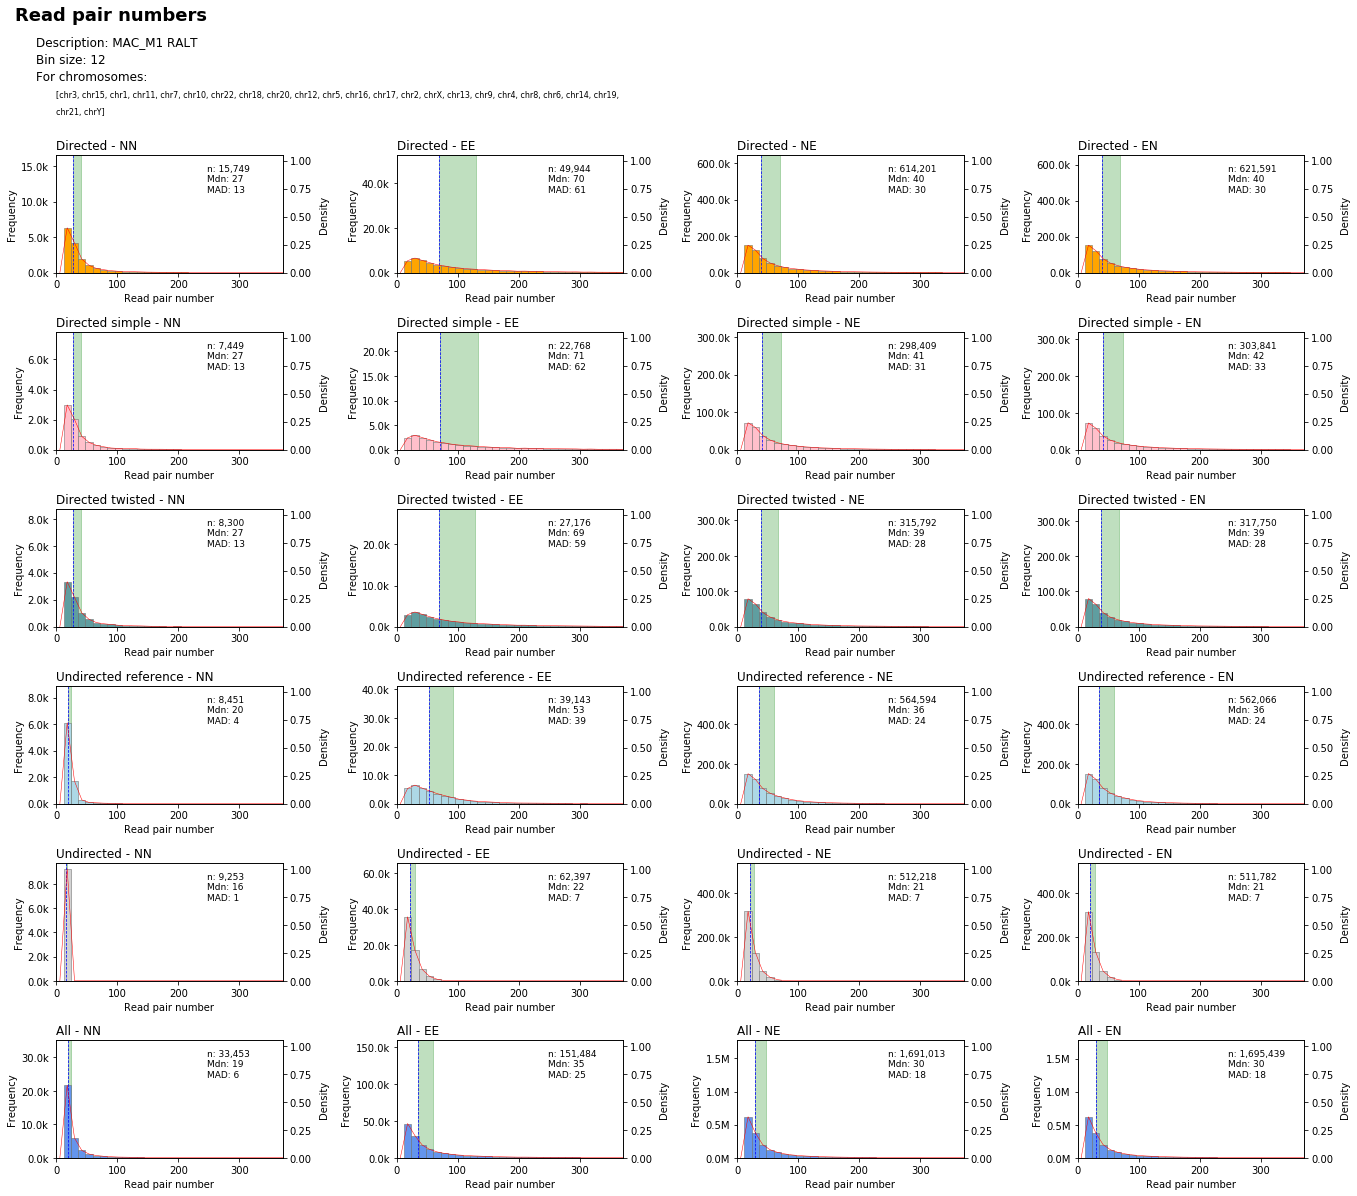

In [8]:
fig = ia_freq_dist_analysis.get_all_rp_nums_or_i_dists_histograms(
    num_dict = rp_num_dict,
    i_cats = ['DI', 'DI_S', 'DI_T', 'UIR', 'UI','ALL'],
    e_cats = ['NN', 'EE', 'NE', 'EN'],
    q_lim = 0.95,
    description = 'MAC_M1 RALT',
    pdf_file_name ='MAC_M1_RALT_read_pair_number_histograms_ALL_CATS.pdf'
)

In the grid, the x-axes of all histograms are comparable, with at least 95% of the data shown in each plot. Each histogram has two y-axes. The left axis shows the absolute frequencies and the right axis shows the relative frequencies or densities. Also the y-axes of all histograms in the grid are comparable in terms of density. Each histogram contains three text fields, one for the number of interactions (n), one for the median (Mdn.) and one for the median absolute deviation (MAD). In addition, a blue dashed line is drawn at the median and the width of the  range highlighted in green corresponds to the MAD.

In the last row of the grid (`ALL`), one can easily see that most of the interactions belong to the enrichment categories `NE` (46%) and `EN` (46%). In contrast to that, the categories `NN` (5%) and `EE` (3%) have far fewer interactions. In the caategory ``NN``, the read pair counts are shifted towards smaller counts.

When comparing the interaction categories, it can be seen that the directed interactions only make up a small percentage. For instance, 4.3% in category `NE`. For the categories `EN` and `EE` the percenatges are comparable, but for `NN` it is only 1.4%. This also applies to the undirected reference interactions, which is due to the way in which they are selected. All other interactions belong to the undirected interactions.

As to be expected, the category `NN` has the lowest and the category `EE` the highest median read pair counts. When comparing the medians of the categories `EE` with `NE` (or `EN`) it is noticable that the difference in the directed interactions is much more pronounced (79 vs. 44) than in the undirected interactions (23 vs. 20). Finally, the medians of the read pair numbers per interaction are almost identical for all enrichment categories for directed and undirected reference interactions, which is again due to the way in which the reference interactions are selected.

## Distributions of interaction distances for all categories

The following command creates the plots for the distributions of interaction distances in all categories.

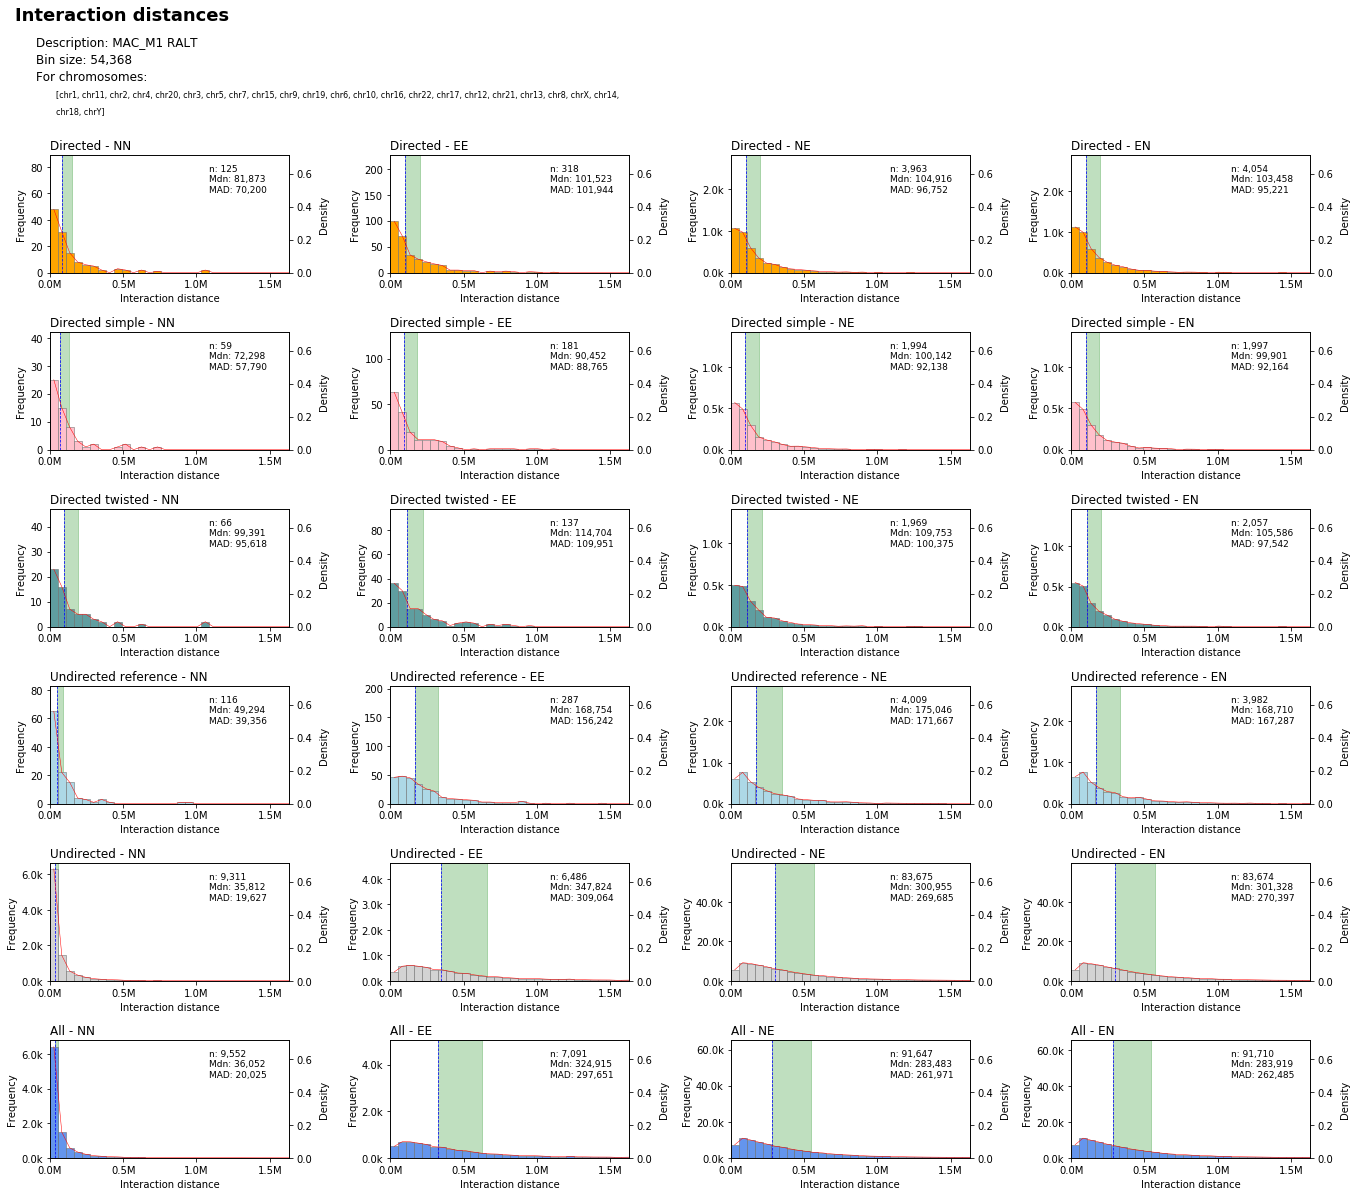

In [19]:
fig = ia_freq_dist_analysis.get_all_rp_nums_or_i_dists_histograms(
    num_dict = i_dist_dict,
    i_cats = ['DI', 'DI_S', 'DI_T', 'UIR', 'UI','ALL'],
    e_cats = ['NN', 'EE', 'NE', 'EN'],
    q_lim = 0.95,
    description = 'MAC_M1 RALT',
    pdf_file_name ='MAC_M1_RALT_interaction_distance_histograms_ALL_CATS.pdf'
)

For the categories `EE`, `NE` and `EN`, the distances for directed and undirected reference interactions are shorter as compared to undirected interactions. In the category `NN` it is exactly the opposite.

## Histograms for a selction of interaction and enrichment categories

The grid with all histograms has the advantage that all categories can be compared at once with regard to density distribution, but it shows too much information and most of the histograms are strongly compressed, both on the x and on the y axis. The function `get_all_rp_nums_or_i_dists_histograms()` therefore allows to restrict to certain interaction and enrichment categories. The following command creates a grid of read pairs per interaction distributions from the same data, but for a selction of three interaction and three enrichment categories.

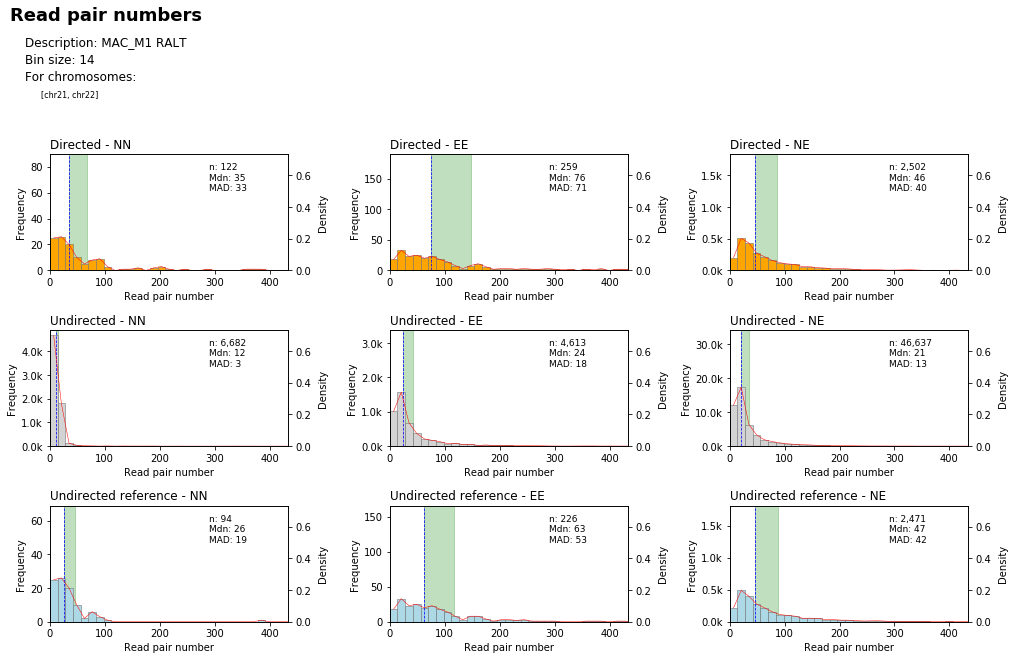

In [11]:
fig = ia_freq_dist_analysis.get_all_rp_nums_or_i_dists_histograms(
    num_dict = rp_num_dict,
    i_cats = ['DI', 'UI', 'UIR'],
    e_cats = ['NN', 'EE', 'NE'],
    q_lim = 0.95,
    description = 'MAC_M1 RALT',
    pdf_file_name ='MAC_M1_RALT_read_pair_number_histograms_DI_UI_UIR_NN_EE_NE.pdf'
)

In the enrichment categories, we leave out the `EN` category because it is almost identical to the `NE` catgorory. We  also leave out the interaction categories `DI_S`, `DI_T` and `ALL` here. Although the axes are still compressed in this representation, the picture is much clearer.

Compared to the undirected interactions, the  directed interactions have much higher read pair counts per interaction, especially in the categories `EE` and `NE`. The  read pair counts for the undirected reference interactions are comparable to directed interactions in all enrichment categories, both in terms of total numbers and the distributions of read pair numbers per interaction.

The following command creates the same plot again, but this time for the medians of interaction distances.

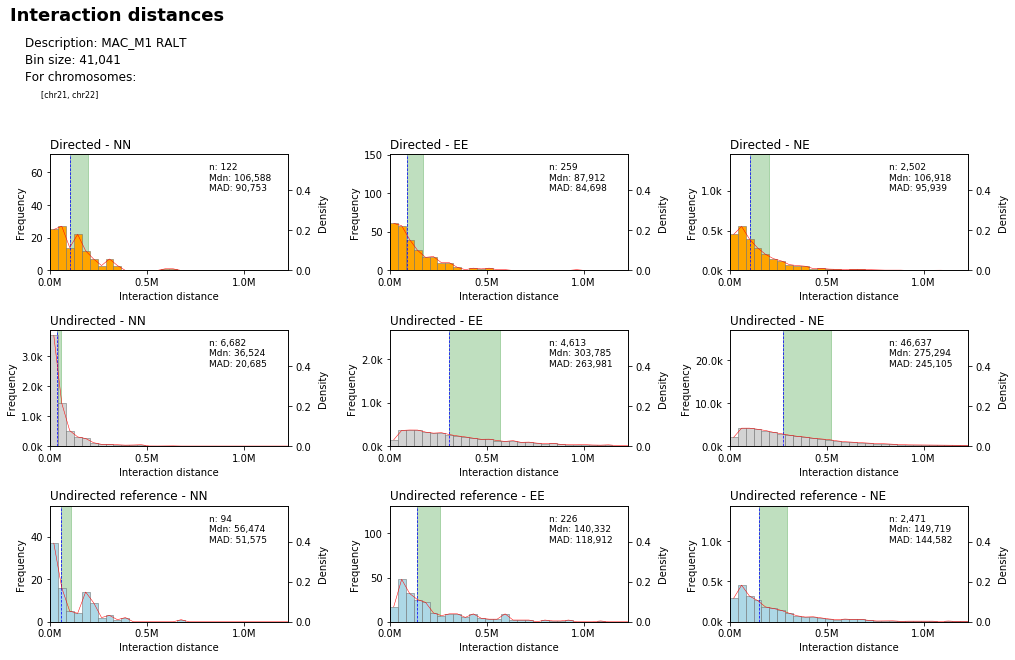

In [12]:
fig = ia_freq_dist_analysis.get_all_rp_nums_or_i_dists_histograms(
    num_dict = i_dist_dict,
    i_cats = ['DI', 'UI', 'UIR'],
    e_cats = ['NN', 'EE', 'NE'],
    q_lim = 0.95,
    description = 'MAC_M1 RALT',
    pdf_file_name ='MAC_M1_RALT_interaction_distance_histograms_DI_UI_UIR_NN_EE_NE.pdf'
)

In the categories `EE` and `NE`, the distances of directed interactions are much shorter as compared to undirected interactions. But also in comparison to the undirected reference interactions, which are absolutely comparable to directed interactions with respect to interaction numbers and the distribution of read pairs per interactions, the directed interactions are shorter. We attribute this to distance-dependent interaction frequencies. Undirected  reference interactions are longer than directed interactions, because at shorter distances it becomes less likely that two regions come into contact with one another in two different relative orientations.

The reverse is true for the category `NN`. Here the undirected interactions are shortest and also the undirected reference interactions are shorter. These interactions have less often a common origin as compared to the interactions from the categories `EE` and `NE`, because neither of the two digests is enriched. Random contacts along the genome occur more often over short than over long distances and are characterized by a low number of read pairs. This explains why undirected interactions in `NN` ar so particularly short. For the undirected reference interactions, a higher readd pair number per interaction is enforced by the selection procedure. This is like increasing the sequencing depth, in which less frequent random contact could be detected over greater distances. From this point of view, it makes sense that undirected reference interactions are longer than undirected interactions.  <font color='red'>We cannnot explain why the directed interactions are longer in this case. </font>

However, for this capture Hi-C dataset, the category `NN` (5%) forms only a small part of all interactions. Therefore, we focus on the categories `EE` and `NE`.

## Density difference plots for directed and undirected reference interactions

To examine pairs of interaction and ennrichment categories more closely, the density difference plot can be used. For this plot, exactly two interaction and enrichment categories must be specified. Next, we compare the interaction categories directed and undirected reference in the enrichment categories `EE` and `NE`.

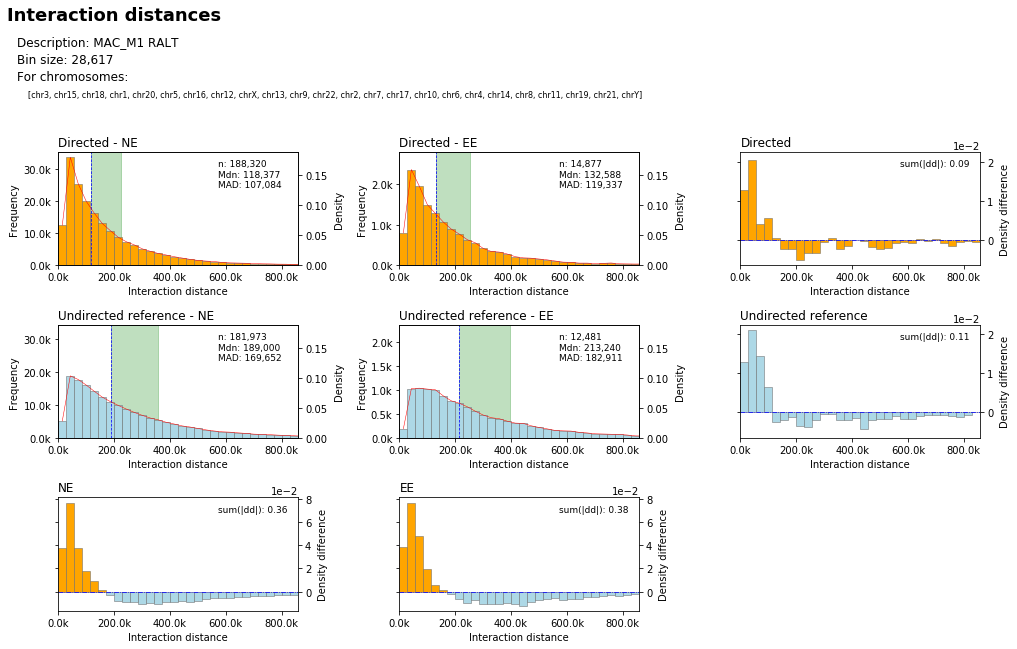

In [41]:
fig = ia_freq_dist_analysis.get_all_rp_nums_or_i_dists_denisty_diff_plot(
    num_dict = i_dist_dict,
    i_cats = ['DI', 'UIR'],
    e_cats = ['NE', 'EE'],
    q_lim = 0.95,
    description = 'MAC_M1 RALT',
    pdf_file_name ='MAC_M1_RALT_interaction_distance_densitity_diff_plot_DI_UIR_EE_NE.pdf'
)

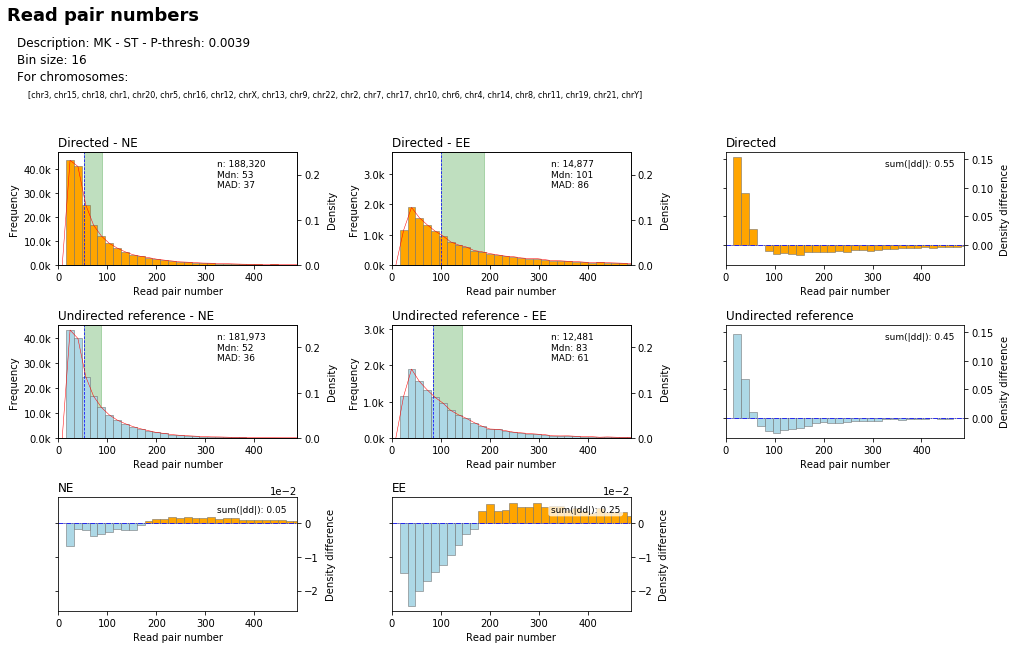

In [42]:
fig = ia_freq_dist_analysis.get_all_rp_nums_or_i_dists_denisty_diff_plot(
    num_dict = rp_num_dict,
    #num_dict = i_dist_dict,
    i_cats = ['DI', 'UIR'],
    e_cats = ['NE', 'EE'],
    q_lim = 0.95,
    #description = 'MK - HTR - P-thresh: 0.025',
    description = 'MK - ST - P-thresh: 0.0039',
    pdf_file_name ='MAC_M1_RALT_interaction_distance_densitity_diff_plot_DI_UIR_EE_NE.pdf'
)

### Explanation of the plot

The fields at the top left show the histograms that we already know from the previous plots. The upper limit for the x-axes is chosen so that each histogram shows at leaast 95% of the data and the y-axes are again normalized to the maximum density in the four histograms. The density difference plot is to be read line by line and column by column. For instance, the bar plot at the bottom of the first column shows the differences in densities in the bins of the two histograms above. The difference of densities is shown on the left axis in scientific format. At the top right, the sum of the absolute values of differences is shown. For completely different distributions, the sum of the positive differences is 1 and the sum of the negative differences -1. Therefore, the sum of the absolute values of differences cannot be greater than 2. In the density difference plots below the histograms, the two interaction categories are compared within the same ennrichment category and, in the dennsity difference plots to the right of the histograms, two enrichment states are compared within the same interaction category.

### Interpretation of the plot

In this representation it can be seen that there is a shift towards shorter distances in the directed interactions, both for `EE` and `NE`. In the density difference plots below the histograms, it can be seen that this shift is caused  by the fact that interactions with a length of up to about 100,000 bp are overrepresented in the directed interactions (orange bars pointing upwards). When comparing the median distances of the enrichment categories `EE` and `NE`, it can be seen that the interactions from `EE` are shifted towards shorter distances, both for directed and undirected reference interactions. In case of the undirected interactions, the shift is even more pronounced. The density difference plots to the right of the histograms, show that this is due to an overrepresentation of particularly short interactions in the enricchment category `EE`. Furthermore, it can be seen that the distributions of `EE` and `NE` differ less in the directed interactions (compare sum(|DD|)).

## Density difference plots for directed simple and directed twisted interactions

We explained the shorter distances in the directed interactions by assuming that two regions are less likely to come into conatct with each other in the same relative orientation over longer distances. For this  purpose, we selected undirected reference interactions in such a way that they are comparable with regard to the total number and the distribution of read pair numbers per interaction.

Here we use a second approach to check our modell with the directed interactions. This approach does not require the  selction of undirected reference interactions. Instead, the directed interactions are broken down into those with predominatly simple or twisted interactions. The rationale is as follows: In directed twisted interactions, the DNA between two innteracting regions must make at least two turns, whereas for directed simple interactions one turn is sufficient. We aassume that two turns require a greater distance than one turn and, therefore, we expect that there will be more very short interactions in the directed simple interactions.

The following command creates a density difference plot for the interaction categories directed simple and twisted and for the enrichment categories `EE` and `NE`.

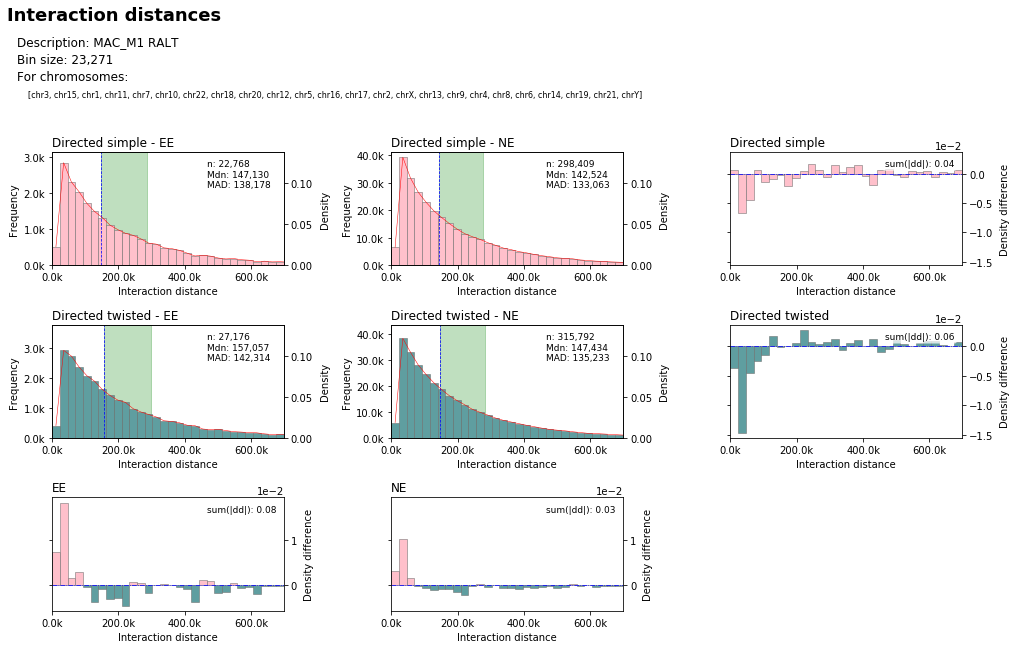

In [11]:
fig = ia_freq_dist_analysis.get_all_rp_nums_or_i_dists_denisty_diff_plot(
    num_dict = i_dist_dict,
    i_cats = ['DI_S', 'DI_T'],
    e_cats = ['EE', 'NE'],
    q_lim = 0.95,
    description = 'MAC_M1 RALT',
    pdf_file_name ='MAC_M1_RALT_interaction_distance_densitity_diff_plot_DI_S_DI_T_EE_NE.pdf'
)

When comaring the medians it can be seen that those for directed simple interactions are shifted towards shorter distances. The shift is much more pronounced in the interactions from `EE` (`107,618 - 92,902 = 14,716`) than in those  from `NE` (`107,731 - 103,591 = 4,140`). In the density difference plots below, it can be seen that the shift can be explained by a overrepresenation of very short interactions (up to about 36,000 bp) in the category directed simple. This corresponds to the expectation formulated at the beginning.When comparing the caategories `EE` and `NN` it can be seen that the median for EE is only shifted towards shorter distances for the directed simple interactions.  The density difference plot on the right shows that short simple interactions are overrepresented in the category `EE`. In the directed twisted interactions, there is no overrepresentation of `EE` or `NE` interactions and the median distances are almost identical.

## Writing out the results in one table row

So far, we have shown the results for a single cell type only. We observed a relatively large shift in the  comparison with the undirected reference interactions. For the comparison of directed simple and directed twisted interactions, the shift was much smaller especially for the interactions from the enrichment category `NE`. In order to distinguish small random from systematic fluctuations, results from different datasets can be combined. For example, if the directed twisted interactions are slightly longer than directed simple interactions across all datasets, then it is probably not a random fluctuation.

The function `ia_freq_dist_analysis.write_num_table()` can be used to export all values that are shown in the top right of the histograms to two tab separated files, one file for read pair numbers and one file for interaction distances.

We have six interaction and four enrichment categories and, for each pair, we have three values (n, Mdn. and MAD), which makes a total of 72 values. The first column contains a more detailed description of the row (`DESCRIPTION`) and the second column a short description (`DESCRIPTION_SHORT`), e.g. for the cell type, that is intended to be shown in the plots. This is followed by the 72 columns with values and a last column for the chromosomes that were taken into account for the respective row (`CHROMS`). This results in 75 columns.



```
DESCRIPTION   ...                           # MA_M1_RP_NUM_CHR21 or MA_M1_RP_NUM_CHR_ALL

DESCRIPTION_SHORT   ...                     # MA_M1

DI_NN_N   DI_NN_MED   DI_NN_MAD   ...
DI_NE_N   DI_NE_MED   DI_NE_MAD   ...
DI_EN_N   DI_EN_MED   DI_EN_MAD   ...
DI_EE_N   DI_EE_MED   DI_EE_MAD   ...

DI_S_NN_N   DI_S_NN_MED   DI_S_NN_MAD   ...
DI_S_NE_N   DI_S_NE_MED   DI_S_NE_MAD   ...

...

UI_EN_N   UI_EN_MED   UI_EN_MAD   ...
UI_EE_N   UI_EE_MED   UI_EE_MAD   ...

ALL_NN_N   ALL_NN_MED   ALL_NN_MAD   ...
ALL_NE_N   ALL_NE_MED   ALL_NE_MAD   ...
ALL_EN_N   ALL_EN_MED   ALL_EN_MAD   ...
ALL_EE_N   ALL_EE_MED   ALL_EE_MAD   ...

CHROMS                                       # ['chr21'] or ['chr21','chr22']

```

In [12]:
ia_freq_dist_analysis.write_num_table(
    out_prefix = 'MAM1',
    description = 'MAM1',
    verbose = True)

[INFO] Writing results about read pair numbers and interaction distances to tab separated files ...
	[INFO] Processing chromosome chr15 ...
	[INFO] Processing chromosome chr3 ...
	[INFO] Processing chromosome chr4 ...
	[INFO] Processing chromosome chr5 ...
	[INFO] Processing chromosome chr14 ...
	[INFO] Processing chromosome chr2 ...
	[INFO] Processing chromosome chr13 ...
	[INFO] Processing chromosome chr11 ...
	[INFO] Processing chromosome chr7 ...
	[INFO] Processing chromosome chr9 ...
	[INFO] Processing chromosome chr1 ...
	[INFO] Processing chromosome chr8 ...
	[INFO] Processing chromosome chr17 ...
	[INFO] Processing chromosome chr18 ...
	[INFO] Processing chromosome chr21 ...
	[INFO] Processing chromosome chr10 ...
	[INFO] Processing chromosome chrX ...
	[INFO] Processing chromosome chr6 ...
	[INFO] Processing chromosome chr16 ...
	[INFO] Processing chromosome chr12 ...
	[INFO] Processing chromosome chr19 ...
	[INFO] Processing chromosome chr22 ...
	[INFO] Processing chromosome 